# Preparación, Analisis y Modelamiento de Datos
##### Luengas R. Fabian

Los datos que se presentan son los resultados que se originaron de las prueba saber pro competencias genericas en el año 2019 segundo periodo y han sido recuperados desde datos.abiertos.gov.co, es de aclarar que los datos tambien han sido filtrados por ESTU PRGM MUNICIPIO == 'BOGOTA' por tanto, el presente analisis se desarrolla solamente para la ciudad capital.

Este trabajo busca ajustar el mejor modelo de pronostico de los datos, para ello, se realiza un analisis descriptivo de las variables predictoras con el fin de identificar problemas latentes en su distribución y/o tipos de datos.

### Librerias.
Las librerias usadas se dividen según su funcionalidad dentro del tratamiento y analisis de datos.

In [39]:
# Tratamiento
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
pd.options.display.float_format='{:.4f}'.format
style.use('ggplot') or plt.style.use('ggplot')

# Analisis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.tree import export_graphviz
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

# System
from io import StringIO
from IPython.display import Image
import pydotplus

%matplotlib inline

##### Carga de datos

In [2]:
df = pd.read_csv('gener2019Bog.csv')

C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,12,13,14,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Tratamiento de Datos: Reducción de Dimensiones.

#### Revisión Variables Dataset
A continuación se realiza un analisis general a todas las variables del dataset con el fin de determinar su aporte y participación en los demas analisis que le preceda a este. Inicialmente, Se puede apreciar un total de 106 variables, entre ellas se encuentran positbles variables categoricas y numericas, por tanto, identificar y separar las variables para su respectivo analisis es un punto importante a desarrollar en este analisis, en primera instancia, se le dará tratamiento a las variables que transmiten ruido en el dataset y no aportan información relevante.

#### Analisis de Variables String.
Existen variables en el dataset solamente contienen un valor unico es decir no expresan ninguna variabilidad.

En esta sección se identifican y clasifican estas variables nulas, empezando por las variables de tipo object las cuales se describen como variables de cadenas de caracteres que pueden transformarse a variables categoricas.

In [4]:
variables_nulas = []
for var in df.columns:
    if df[var].dtype == 'object':
        if df[var].nunique() == 1:
            variables_nulas.append(var)
            
print(variables_nulas)

['ESTU_ESTUDIANTE', 'ESTU_DISC_FISICA', 'ESTU_DISC_SISTEM', 'ESTU_DISC_AUDITCASTELL', 'ESTU_DISC_AUDITLSC', 'ESTU_DISC_VISUALCEGUE', 'ESTU_DISC_VISUALBAJA', 'ESTU_DISC_VOZHABLA', 'ESTU_DISC_INTELEC', 'ESTU_DISC_SORDOCEGUERA', 'ESTU_DISC_PSICOSOCIAL', 'ESTU_DISC_ASPERGER', 'ESTU_PRGM_MUNICIPIO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_NIVEL_PRGM_ACADEMICO']


Una vez se recogen dichas variables, se eliminan del dataset original, sin embargo, el data set sigue presentando valores **nulos** los cuales mas adelante se tratarán.

In [5]:
df.drop(variables_nulas,axis=1, inplace=True)
df.drop(['ESTU_FECHANACIMIENTO'],axis=1,inplace=True)

#### Definición de Variables Categoricas.
A continuación se transforman las variables de cadenas de caracteres en variables categoricas y se referencian en una lista con el fin de ser filtradas y separadas del dataset original.

In [6]:
variables_cat = []
for var in df.columns:
    if df[var].dtype == 'object':
        df[var] = df[var].astype('category')
        variables_cat.append(var)
print(variables_cat)

['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_EXTERIOR', 'ESTU_CONSECUTIVO', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'ESTU_AREARESIDE', 'ESTU_OTROCOLE_TERMINO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA', 'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES', 'ESTU_PAGOMATRICULAPROPIO', 'ESTU_COMOCAPACITOEXAMENSB11', 'ESTU_CURSODOCENTESIES', 'ESTU_CURSOIESAPOYOEXTERNO', 'ESTU_CURSOIESEXTERNA', 'ESTU_SIMULACROTIPOICFES', 'ESTU_ACTIVIDADREFUERZOAREAS', 'ESTU_ACTIVIDADREFUERZOGENERIC', 'ESTU_TIPODOCUMENTOSB11', 'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_CUANTOSCOMPARTEBAÑO', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'ESTU_HORASSEMANATRABAJA', 'INST_NOMBRE_INSTITUCION', '

#### Definición de Variables Numericas
Se encuentran variables numericas que representan ubicación y/o clasificación de la región de residencia del estudiante, por tanto, su varianza y su escala es significativamente un orden mayor a comparación de las demas variables de tipo numericas.
Dichas variables se determina excluir del data set original.

In [7]:
df.mean(axis=0)

Unnamed: 0                           133922.6052
PERIODO                               20194.9920
ESTU_COD_RESIDE_DEPTO                    87.3935
ESTU_COD_RESIDE_MCPIO                 20394.2384
ESTU_COLE_TERMINO                     10581.7538
ESTU_CODDANE_COLE_TERMINO      216361026300.4610
ESTU_COD_COLE_MCPIO_TERMINO           25653.6138
INST_COD_INSTITUCION                   2569.5988
ESTU_SNIES_PRGMACADEMICO              42553.4524
ESTU_PRGM_CODMUNICIPIO                11001.0000
ESTU_INST_CODMUNICIPIO                11160.3034
ESTU_COD_MCPIO_PRESENTACION           19838.4769
ESTU_COD_DEPTO_PRESENTACION              19.7585
MOD_RAZONA_CUANTITAT_PUNT               148.0248
MOD_RAZONA_CUANTITAT_DESEM                2.2177
MOD_RAZONA_CUANTITATIVO_PNAL             51.9248
MOD_RAZONA_CUANTITATIVO_PNBC             52.4351
MOD_LECTURA_CRITICA_PUNT                149.9592
MOD_LECTURA_CRITICA_DESEM                 2.2430
MOD_LECTURA_CRITICA_PNAL                 51.3430
MOD_LECTURA_CRITICA_

In [8]:
df.var(axis=0)

Unnamed: 0                                  6314367706.8490
PERIODO                                              0.0101
ESTU_COD_RESIDE_DEPTO                          6710143.1077
ESTU_COD_RESIDE_MCPIO                        371644675.7408
ESTU_COLE_TERMINO                            419756168.6143
ESTU_CODDANE_COLE_TERMINO      10089811162303421218816.0000
ESTU_COD_COLE_MCPIO_TERMINO                  501824378.0506
INST_COD_INSTITUCION                           1747686.5695
ESTU_SNIES_PRGMACADEMICO                    1710043848.6426
ESTU_PRGM_CODMUNICIPIO                               0.0000
ESTU_INST_CODMUNICIPIO                         8993530.1805
ESTU_COD_MCPIO_PRESENTACION                  362937552.9391
ESTU_COD_DEPTO_PRESENTACION                        361.0766
MOD_RAZONA_CUANTITAT_PUNT                         1005.1524
MOD_RAZONA_CUANTITAT_DESEM                           0.7728
MOD_RAZONA_CUANTITATIVO_PNAL                       828.7066
MOD_RAZONA_CUANTITATIVO_PNBC            

In [7]:
df.drop(['Unnamed: 0','ESTU_CODDANE_COLE_TERMINO'],axis=1,inplace=True)

Tambien se filtran y enlistan las variables numericas del dataset con el fin de identificar las variables que pueden ser tratadas como predictoras y la variable objetivo.

In [8]:
variables_num = []
for var in df.columns:
    if df[var].dtype == 'int64' or df[var].dtype == 'float64':
        variables_num.append(var)
print(variables_num)

['PERIODO', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO', 'INST_COD_INSTITUCION', 'ESTU_SNIES_PRGMACADEMICO', 'ESTU_PRGM_CODMUNICIPIO', 'ESTU_INST_CODMUNICIPIO', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_RAZONA_CUANTITAT_DESEM', 'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_RAZONA_CUANTITATIVO_PNBC', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_LECTURA_CRITICA_DESEM', 'MOD_LECTURA_CRITICA_PNAL', 'MOD_LECTURA_CRITICA_PNBC', 'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_COMPETEN_CIUDADA_DESEM', 'MOD_COMPETEN_CIUDADA_PNAL', 'MOD_COMPETEN_CIUDADA_PNBC', 'MOD_INGLES_PUNT', 'MOD_INGLES_PNAL', 'MOD_INGLES_PNBC', 'MOD_COMUNI_ESCRITA_PUNT', 'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL', 'MOD_COMUNI_ESCRITA_PNBC', 'PUNT_GLOBAL', 'PERCENTIL_NBC', 'PERCENTIL_GLOBAL', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_IES']


Una vez se clasifican todas las variables numericas, se determina estas variables son mayormente consecuencia del resultado de los examenes presentados por los estudiantes, por tanto, no se deben considerar como variables predictoras.

### Tratamiento para Valores Nulos.
Para mayor flexibilidad dadas las dimensiones del dataset original se identifican las variables con mayor cantidad de valores nulos separando las variables categoricas y las numericas.

In [9]:
df_num = df[variables_num]
df_cat = df[variables_cat]

In [10]:
df_num.isna().sum(axis=0)

PERIODO                             0
ESTU_COD_RESIDE_DEPTO            1022
ESTU_COD_RESIDE_MCPIO            1022
ESTU_COLE_TERMINO               28079
ESTU_COD_COLE_MCPIO_TERMINO     41246
INST_COD_INSTITUCION                0
ESTU_SNIES_PRGMACADEMICO            0
ESTU_PRGM_CODMUNICIPIO              0
ESTU_INST_CODMUNICIPIO              0
ESTU_COD_MCPIO_PRESENTACION         0
ESTU_COD_DEPTO_PRESENTACION         0
MOD_RAZONA_CUANTITAT_PUNT           0
MOD_RAZONA_CUANTITAT_DESEM          0
MOD_RAZONA_CUANTITATIVO_PNAL      190
MOD_RAZONA_CUANTITATIVO_PNBC      190
MOD_LECTURA_CRITICA_PUNT            0
MOD_LECTURA_CRITICA_DESEM           0
MOD_LECTURA_CRITICA_PNAL          190
MOD_LECTURA_CRITICA_PNBC          190
MOD_COMPETEN_CIUDADA_PUNT           0
MOD_COMPETEN_CIUDADA_DESEM          0
MOD_COMPETEN_CIUDADA_PNAL         190
MOD_COMPETEN_CIUDADA_PNBC         190
MOD_INGLES_PUNT                    41
MOD_INGLES_PNAL                   190
MOD_INGLES_PNBC                   190
MOD_COMUNI_E

Algunas variables cuentan mayormente con valores nulos, por tanto, antes de eliminar todos los registros o filas que presentan valores nulos, es importante identificar las variables para eliminarlas, debido a que al eliminar los registros estas columnas ocasionaran que se elimine por completo los registros del dataset.

In [11]:
elim_n = ['ESTU_COLE_TERMINO','ESTU_COD_COLE_MCPIO_TERMINO','MOD_COMUNI_ESCRITA_DESEM','ESTU_INSE_INDIVIDUAL','ESTU_NSE_INDIVIDUAL']
df_num.drop(elim_n,axis=1,inplace=True)
df_num.dropna(inplace=True)
df.drop(elim_n,axis=1,inplace=True)

C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-11-b5db9eb36afa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.dropna(inplace=True)


In [12]:
df_cat.isna().sum(axis=0)

ESTU_TIPODOCUMENTO                    0
ESTU_NACIONALIDAD                     0
ESTU_GENERO                          14
ESTU_EXTERIOR                         0
ESTU_CONSECUTIVO                      0
ESTU_PAIS_RESIDE                      0
ESTU_DEPTO_RESIDE                  1022
ESTU_MCPIO_RESIDE                  1022
ESTU_AREARESIDE                    1974
ESTU_OTROCOLE_TERMINO             80747
ESTU_VALORMATRICULAUNIVERSIDAD     2063
ESTU_PAGOMATRICULABECA             2140
ESTU_PAGOMATRICULACREDITO          2117
ESTU_PAGOMATRICULAPADRES           2109
ESTU_PAGOMATRICULAPROPIO           2102
ESTU_COMOCAPACITOEXAMENSB11        1983
ESTU_CURSODOCENTESIES             99614
ESTU_CURSOIESAPOYOEXTERNO         99619
ESTU_CURSOIESEXTERNA              99619
ESTU_SIMULACROTIPOICFES           99613
ESTU_ACTIVIDADREFUERZOAREAS       99614
ESTU_ACTIVIDADREFUERZOGENERIC     99613
ESTU_TIPODOCUMENTOSB11             3363
ESTU_SEMESTRECURSA                 2063
FAMI_EDUCACIONPADRE                4424


In [13]:
elim_c = ['ESTU_OTROCOLE_TERMINO','ESTU_CURSODOCENTESIES','ESTU_CURSOIESAPOYOEXTERNO','ESTU_CURSOIESEXTERNA','ESTU_SIMULACROTIPOICFES',
         'ESTU_ACTIVIDADREFUERZOAREAS','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_CONSECUTIVO','ESTU_PRGM_ACADEMICO','ESTU_MCPIO_PRESENTACION',
         'ESTU_MCPIO_RESIDE','INST_NOMBRE_INSTITUCION']

In [15]:
df_cat.drop(elim_c,axis=1,inplace=True)
df.drop(elim_c,axis=1,inplace=True)
df.dropna(inplace=True)
df_cat.dropna(inplace=True)

KeyError: "['ESTU_OTROCOLE_TERMINO' 'ESTU_CURSODOCENTESIES'\n 'ESTU_CURSOIESAPOYOEXTERNO' 'ESTU_CURSOIESEXTERNA'\n 'ESTU_SIMULACROTIPOICFES' 'ESTU_ACTIVIDADREFUERZOAREAS'\n 'ESTU_ACTIVIDADREFUERZOGENERIC' 'ESTU_CONSECUTIVO' 'ESTU_PRGM_ACADEMICO'\n 'ESTU_MCPIO_PRESENTACION' 'ESTU_MCPIO_RESIDE' 'INST_NOMBRE_INSTITUCION'] not found in axis"

### Selección de Variables.
##### Analisis descriptivo:

A continuación se desarrolla un analisis descriptivo por las variables seleccionadas para la construcción de un modelo de regresión, se podrá identificar factores importantes en cada una de las variables, como distribución de los valores, desbalanceo de clases y valores atipicos.

#### Variable Objetivo (Puntaje Global Prueba ICFES)

Se determina el puntaje global como la variable a pronosticar, a continuación se presenta la distribución que sigue esta variable.


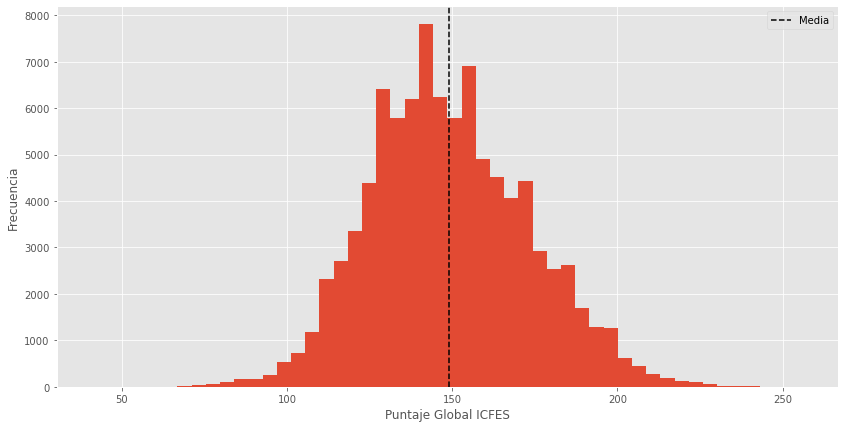

In [15]:
mu = df['PUNT_GLOBAL'].mean()
sigma = np.std(df['PUNT_GLOBAL'])
n_bins = 50

fig,ax = plt.subplots(figsize=(14,7))

n,bins,patches = ax.hist(df['PUNT_GLOBAL'],n_bins,density=False)
ax.set_xlabel('Puntaje Global ICFES')
ax.set_ylabel('Frecuencia')
ax.axvline(mu,linestyle='--',label='Media',color='k')
ax.legend()
plt.show()

In [43]:
df['PUNT_GLOBAL'] = df['PUNT_GLOBAL'].apply(np.log10)

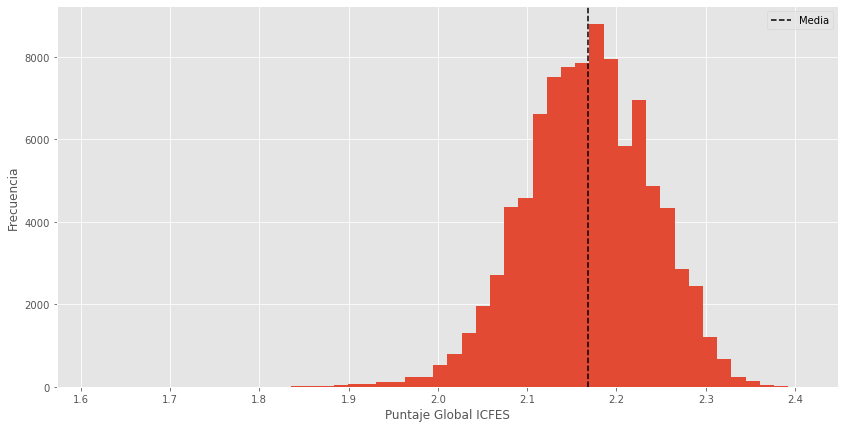

In [45]:
mu = df['PUNT_GLOBAL'].mean()
sigma = np.std(df['PUNT_GLOBAL'])
n_bins = 50

fig,ax = plt.subplots(figsize=(14,7))

n,bins,patches = ax.hist(df['PUNT_GLOBAL'],n_bins,density=False)
ax.set_xlabel('Puntaje Global ICFES')
ax.set_ylabel('Frecuencia')
ax.axvline(mu,linestyle='--',label='Media',color='k')
ax.legend()
plt.show()

La variable **punteo global** presenta una distribución normal, con media de 149 puntos y una desviación estandar de 24 puntos

<AxesSubplot:xlabel='PUNT_GLOBAL'>

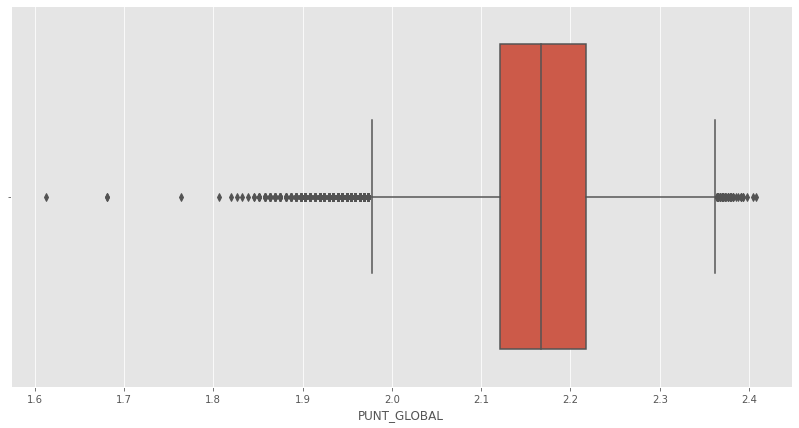

In [46]:
fig,ax = plt.subplots(figsize=(14,7))

sns.boxplot(x=df['PUNT_GLOBAL'])

La grafica **box plot** permite identificar la presencia de valores atipicos tanto por encima de la media como por debajo de ella, ya que la concentarción aproximada del 50% de los datos se encuentra cercana a la media de los resultados observados. 

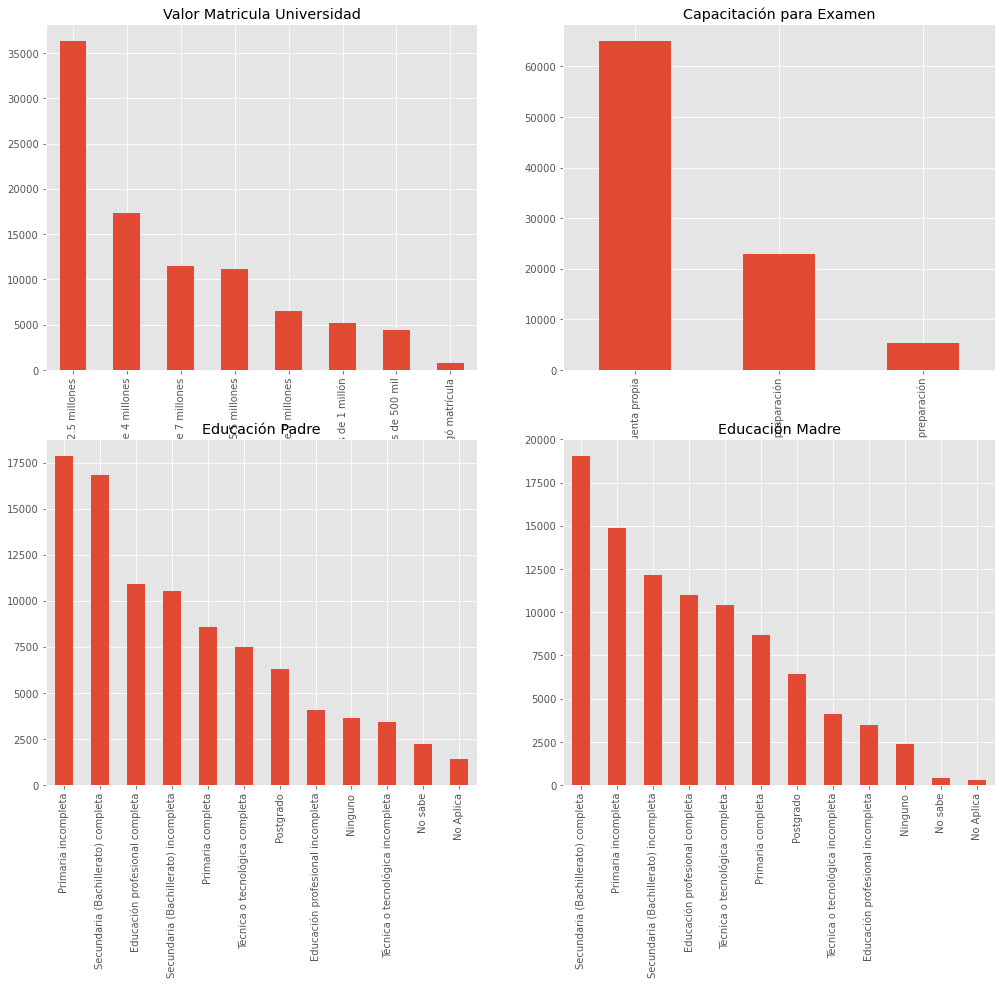

In [18]:
fig,ax = plt.subplots(2,2, figsize= (17,14))

df['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts().plot.bar(ax = ax[0,0],title = 'Valor Matricula Universidad')
df['ESTU_COMOCAPACITOEXAMENSB11'].value_counts().plot.bar(ax = ax[0,1],title = 'Capacitación para Examen')
df['FAMI_EDUCACIONPADRE'].value_counts().plot.bar(ax = ax[1,0],title = 'Educación Padre')
df['FAMI_EDUCACIONMADRE'].value_counts().plot.bar(ax = ax[1,1],title = 'Educación Madre')
plt.show()

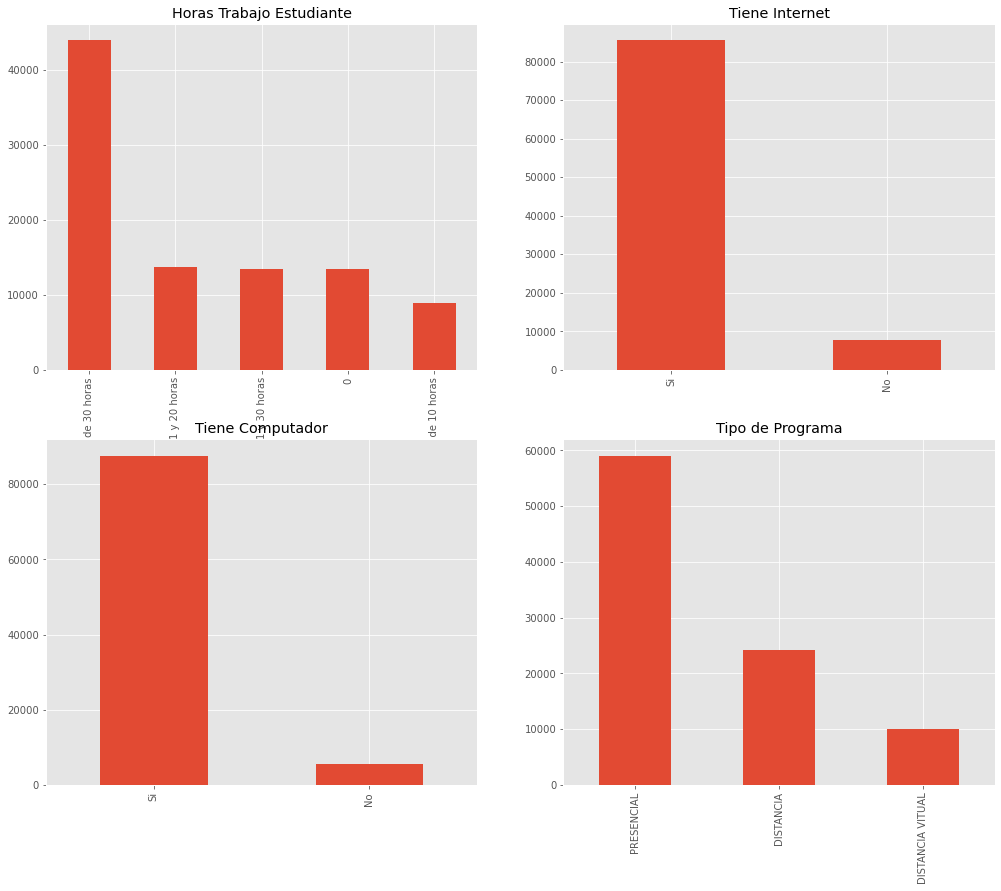

In [19]:
fig,ax = plt.subplots(2,2, figsize= (17,14))

df['ESTU_HORASSEMANATRABAJA'].value_counts().plot.bar(ax = ax[0,0],title = 'Horas Trabajo Estudiante')
df['FAMI_TIENEINTERNET'].value_counts().plot.bar(ax = ax[0,1],title = 'Tiene Internet')
df['FAMI_TIENECOMPUTADOR'].value_counts().plot.bar(ax = ax[1,0],title = 'Tiene Computador')
df['ESTU_METODO_PRGM'].value_counts().plot.bar(ax = ax[1,1],title = 'Tipo de Programa')
plt.show()

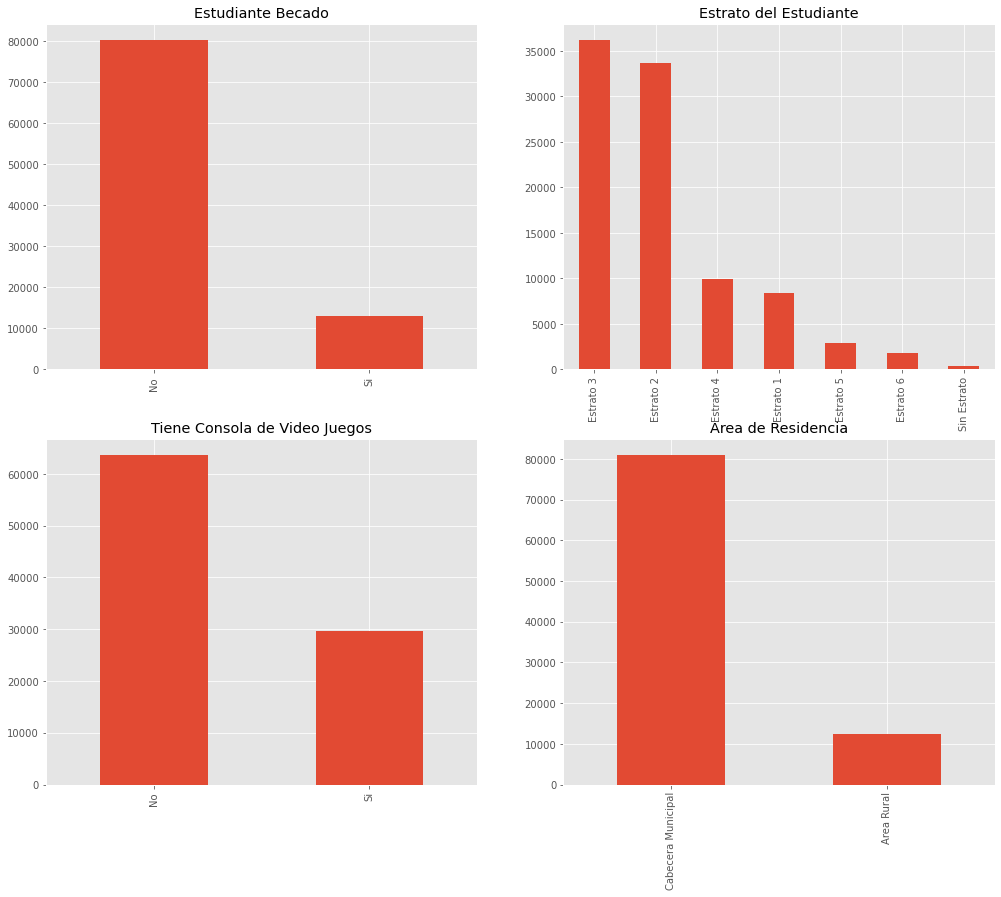

In [20]:
fig,ax = plt.subplots(2,2, figsize= (17,14))

df['ESTU_PAGOMATRICULABECA'].value_counts().plot.bar(ax = ax[0,0],title = 'Estudiante Becado')
df['FAMI_ESTRATOVIVIENDA'].value_counts().plot.bar(ax = ax[0,1],title = 'Estrato del Estudiante')
df['FAMI_TIENECONSOLAVIDEOJUEGOS'].value_counts().plot.bar(ax = ax[1,0],title = 'Tiene Consola de Video Juegos')
df['ESTU_AREARESIDE'].value_counts().plot.bar(ax = ax[1,1],title = 'Area de Residencia')
    
plt.show() 

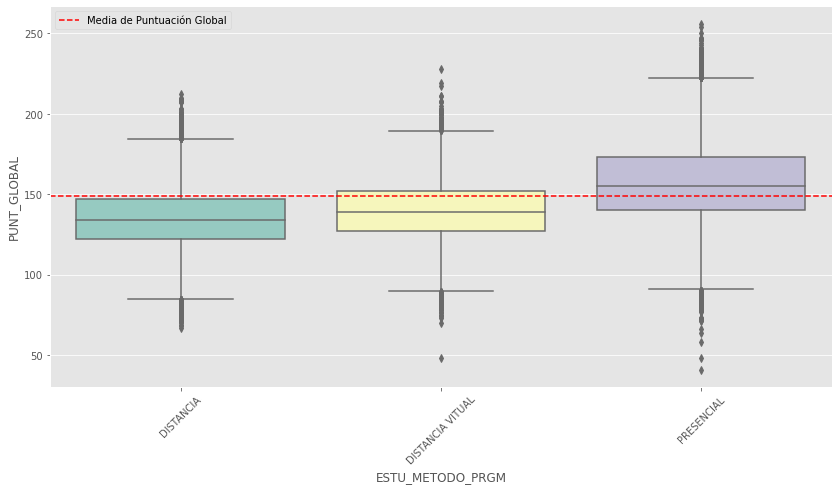

In [21]:
fig,ax = plt.subplots(figsize=(14,7))
sns.boxplot(x=df['ESTU_METODO_PRGM'],y=df['PUNT_GLOBAL'],palette='Set3')
ax.axhline(mu,linestyle='--',label='Media de Puntuación Global',color='r')
ax.legend()
plt.xticks(rotation=45)
plt.show()

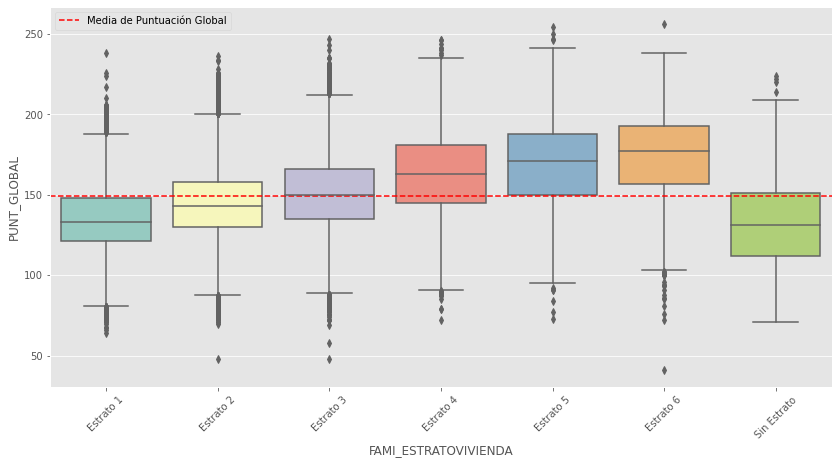

In [22]:
fig,ax = plt.subplots(figsize=(14,7))

sns.boxplot(x=df['FAMI_ESTRATOVIVIENDA'],y=df['PUNT_GLOBAL'],palette='Set3')
ax.axhline(mu,linestyle='--',label='Media de Puntuación Global',color='r')
ax.legend()
plt.xticks(rotation=45)
plt.show()

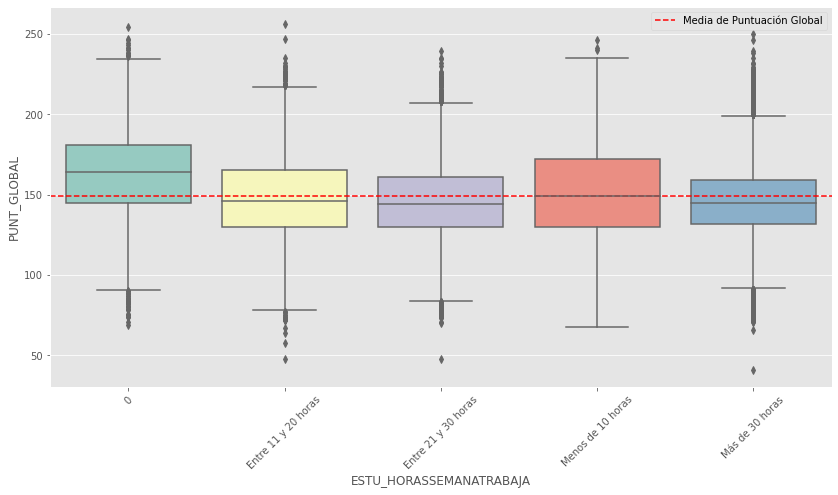

In [23]:
fig,ax = plt.subplots(figsize=(14,7))
sns.boxplot(x=df['ESTU_HORASSEMANATRABAJA'],y=df['PUNT_GLOBAL'],palette='Set3')
ax.axhline(mu,linestyle='--',label='Media de Puntuación Global',color='r')
ax.legend()
plt.xticks(rotation=45)
plt.show()

### Balanceo de Clases: (Valor Matricula Estudiante).


In [16]:
regr_vars = list(['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_COMOCAPACITOEXAMENSB11','FAMI_TIENECONSOLAVIDEOJUEGOS',
                 'ESTU_AREARESIDE','ESTU_HORASSEMANATRABAJA','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR',
                 'ESTU_METODO_PRGM','ESTU_PAGOMATRICULABECA','FAMI_ESTRATOVIVIENDA'])

all_vars = list(['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_COMOCAPACITOEXAMENSB11','FAMI_TIENECONSOLAVIDEOJUEGOS',
                 'ESTU_AREARESIDE','ESTU_HORASSEMANATRABAJA','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR',
                 'ESTU_METODO_PRGM','ESTU_PAGOMATRICULABECA','FAMI_ESTRATOVIVIENDA','PUNT_GLOBAL'])

In [17]:
df['ESTU_METODO_PRGM'].value_counts()

PRESENCIAL          59053
DISTANCIA           24213
DISTANCIA VITUAL    10044
Name: ESTU_METODO_PRGM, dtype: int64

In [22]:
new_df = df[all_vars]

X_temp = new_df.drop(['PUNT_GLOBAL'],axis=1)
y_temp = new_df['PUNT_GLOBAL']

# Partición de los datos de entrenamiento para balancear
X_train_b , X_test_b , y_train_b , y_test_b = train_test_split(X_temp, y_temp ,
                                                               test_size=0.2,random_state=1
                                                              )
# Union Datos de testeo para entrenamiento para balancear

df_b = pd.merge(y_train_b,X_train_b,left_index=True,right_index=True)

pres = df_b.loc[df_b['ESTU_METODO_PRGM'] == 'PRESENCIAL']

dist = df_b.loc[df_b['ESTU_METODO_PRGM'] == 'DISTANCIA']

virt = df_b.loc[df_b['ESTU_METODO_PRGM'] == 'DISTANCIA VITUAL'][:10044]


index_random = list(np.random.choice(pres.index, size=10044, replace=False) )

a = pres.loc[index_random]



index_random_1 = list(np.random.choice(dist.index, size=10044, replace=False) )

b = dist.loc[index_random_1]

# Ahora balanceo
balanced = pd.concat([a, b,virt])
balanced.columns
tested = pd.merge(X_test_b,y_test_b,left_index=True,right_index=True)

## Modelo de Pronostico del Puntaje Global 1 Clase Balanceada.

#### Variables Dummies:

In [19]:
#One Hot Encoding
filter_x = []
for i in regr_vars:
    categorias = balanced[i].value_counts().index
    for k in categorias:
        name = 'is-'+str(i)+'-'+str(k)
        balanced[name] = np.where(balanced[i]==k,1,0)
        filter_x.append(name)
    balanced = balanced.drop([i],axis=1)
    
X_1 = balanced[filter_x]
y_1 = balanced['PUNT_GLOBAL']

modelo_tree_1 = DecisionTreeRegressor(
            max_depth = 3,
            random_state = 1
    )

modelo_tree_1.fit(X_1,y_1)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [23]:
for i in regr_vars:
    categorias = tested[i].value_counts().index
    for k in categorias:
        name = 'is-'+str(i)+'-'+str(k)
        tested[name] = np.where(tested[i]==k,1,0)
    tested = tested.drop([i],axis=1)

In [24]:
X_t = tested.drop(['PUNT_GLOBAL'],axis=1)
y_t = tested['PUNT_GLOBAL']


y_pred_b = modelo_tree_1.predict(X = X_t)

rmse_1 = mean_squared_error(
        y_true  = y_t,
        y_pred  = y_pred_b,
        squared = False
       )
var_ex_1 = explained_variance_score(y_t,y_pred_b)

print(f"El error (rmse) de test es: {rmse_1} y la varianza explicada es de: {var_ex_1}")

El error (rmse) de test es: 29.81954976846634 y la varianza explicada es de: -0.42224375857832785


## Modelo de Pronostico del Puntaje Global.

#### Variables Dummies:

In [25]:
#One Hot Encoding
filter_x = []
for i in regr_vars:
    categorias = df[i].value_counts().index
    for k in categorias:
        name = 'is-'+str(i)+'-'+str(k)
        df[name] = np.where(df[i]==k,1,0)
        filter_x.append(name)
    df = df.drop([i],axis=1)
    
X_2 = df[filter_x]
y_2 = df['PUNT_GLOBAL']
X_train,X_test,y_train,y_test = train_test_split(X_2,y_2,test_size=0.2,random_state=1)

In [33]:
X_train.columns

Index(['is-ESTU_VALORMATRICULAUNIVERSIDAD-Entre 1 millón y menos de 2.5 millones',
       'is-ESTU_VALORMATRICULAUNIVERSIDAD-Entre 2.5 millones y menos de 4 millones',
       'is-ESTU_VALORMATRICULAUNIVERSIDAD-Más de 7 millones',
       'is-ESTU_VALORMATRICULAUNIVERSIDAD-Entre 4 millones y menos de 5.5 millones',
       'is-ESTU_VALORMATRICULAUNIVERSIDAD-Entre 5.5 millones y menos de 7 millones',
       'is-ESTU_VALORMATRICULAUNIVERSIDAD-Entre 500 mil y menos de 1 millón',
       'is-ESTU_VALORMATRICULAUNIVERSIDAD-Menos de 500 mil',
       'is-ESTU_VALORMATRICULAUNIVERSIDAD-No pagó matrícula',
       'is-ESTU_COMOCAPACITOEXAMENSB11-Repasó por cuenta propia',
       'is-ESTU_COMOCAPACITOEXAMENSB11-No realizó ninguna prueba de preparación',
       'is-ESTU_COMOCAPACITOEXAMENSB11-Tomó un curso de preparación',
       'is-FAMI_TIENECONSOLAVIDEOJUEGOS-No',
       'is-FAMI_TIENECONSOLAVIDEOJUEGOS-Si',
       'is-ESTU_AREARESIDE-Cabecera Municipal',
       'is-ESTU_AREARESIDE-Area Rural',
   

In [26]:
modelo_tree = DecisionTreeRegressor(
            max_depth = 3,
            random_state = 1
    )

modelo_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [27]:
# Importancia de los predictores
imp_pred = pd.DataFrame(
    {'Predictor':X.columns,
    'Importancia': modelo_tree.feature_importances_}
)
imp_pred.sort_values('Importancia', ascending=False).head(10)

,Predictor,Importancia
24,is-ESTU_METODO_PRGM-PRESENCIAL,0.5840
2,is-ESTU_VALORMATRICULAUNIVERSIDAD-Más de 7 mil...,0.3008
1,is-ESTU_VALORMATRICULAUNIVERSIDAD-Entre 2.5 mi...,0.0564
15,is-ESTU_HORASSEMANATRABAJA-Más de 30 horas,0.0295
32,is-FAMI_ESTRATOVIVIENDA-Estrato 1,0.0205
28,is-ESTU_PAGOMATRICULABECA-Si,0.0089
31,is-FAMI_ESTRATOVIVIENDA-Estrato 4,0.0000
30,is-FAMI_ESTRATOVIVIENDA-Estrato 2,0.0000
29,is-FAMI_ESTRATOVIVIENDA-Estrato 3,0.0000
20,is-FAMI_TIENEINTERNET-Si,0.0000


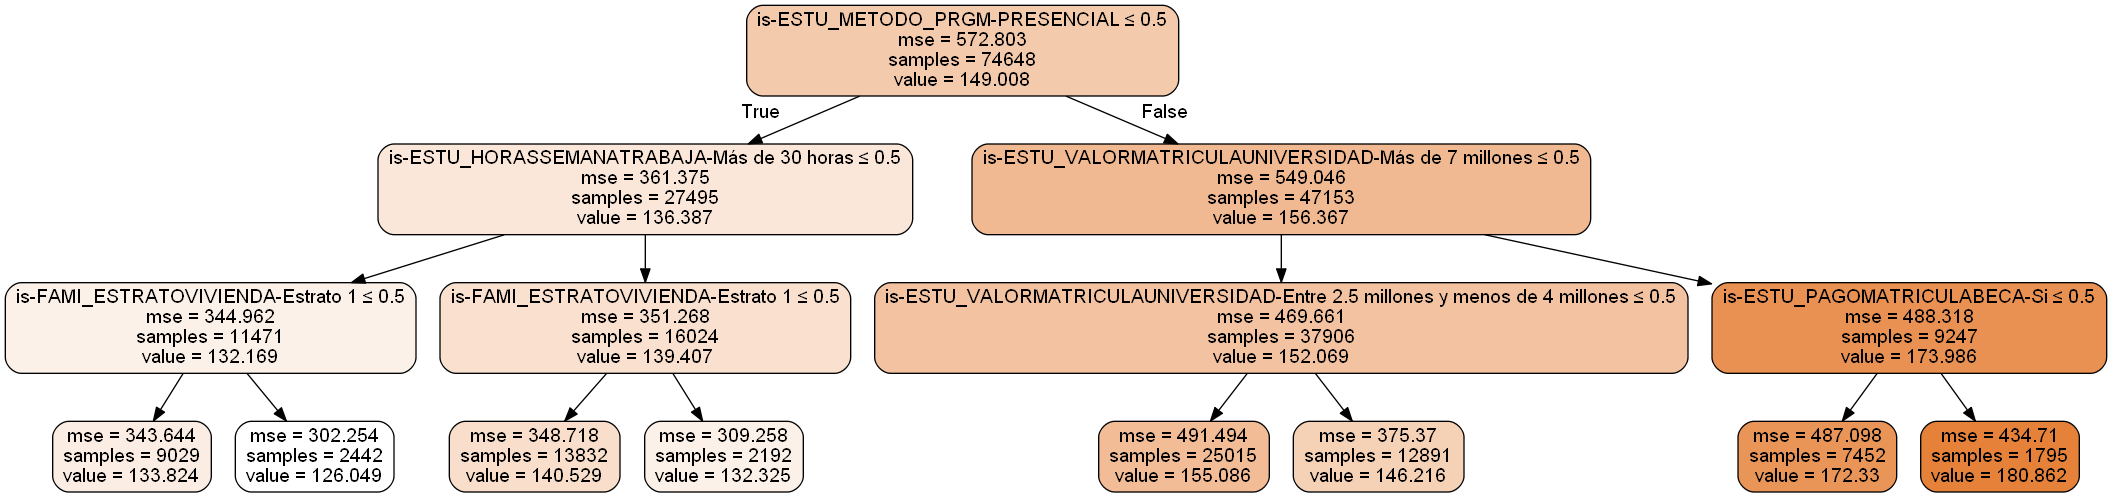

In [28]:
dot_data = StringIO()
export_graphviz(modelo_tree,out_file = dot_data,filled = True,rounded = True,
               special_characters = True, feature_names = X.columns,
                class_names = y.value_counts().index)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('zonas.png')
Image(graph.create_png())

In [29]:
y_predi = modelo_tree.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = y_predi,
        squared = False
       )
var_ex = explained_variance_score(y_test,y_predi)

print(f"El error (rmse) de test es: {rmse} y la varianza explicada es de: {var_ex}")

El error (rmse) de test es: 20.408152862208432 y la varianza explicada es de: 0.28048803895148233


Varianza explicada del modelo, es decir que el modelo explica el tanto % de la varianza de la variable objetivo.
Se debe balancear los datos de entrenamiento no los datos de testeo.

### Podado del Arbol (Pruning)
La busqueda de arboles optimos por validación cruzada permite identificar una 

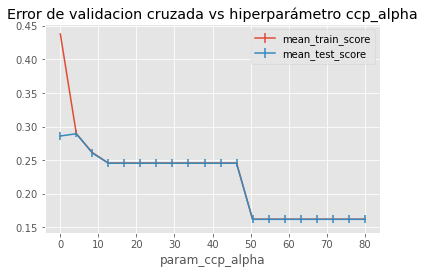

In [30]:
# Valores de ccp_alpha evaluados

param_grid = {'ccp_alpha':np.linspace(0,80,20)}

# Busqueda por validación cruzada

grid = GridSearchCV(
    # El arbol se crece lo maximo posible para despues hacer pruning
    estimator = DecisionTreeRegressor(
        max_depth = None,
        min_samples_split = 2,
        min_samples_leaf = 1,
        random_state = 1
        
        ),
    param_grid = param_grid,
    cv = 10,
    refit = True,
    return_train_score = True
)

grid.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [31]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")


Profundidad del árbol: 5
Número de nodos terminales: 7


In [32]:
    y_predict = modelo_final.predict(X = X_test)

    rmse_1 = mean_squared_error(
            y_true  = y_test,
            y_pred  = y_predict,
            squared = False
           )
    var_ex_1 = explained_variance_score(y_test,y_predict)

    print(f"El error (rmse) de test es: {rmse_1} y la varianza explicada es de: {var_ex_1}")

El error (rmse) de test es: 20.21625043522797 y la varianza explicada es de: 0.2939538974521283


## Disminuir la Complejidad del Modelo

#### Reducción de Variables.

In [35]:
var_mej = list(['is-ESTU_METODO_PRGM-PRESENCIAL',
               'is-ESTU_VALORMATRICULAUNIVERSIDAD-Más de 7 millones',
               'is-ESTU_VALORMATRICULAUNIVERSIDAD-Entre 2.5 millones y menos de 4 millones',
               'is-ESTU_HORASSEMANATRABAJA-Más de 30 horas','is-FAMI_ESTRATOVIVIENDA-Estrato 1'])


X_3 = df[var_mej]
y_3 = df['PUNT_GLOBAL']

X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(X_3,y_3,test_size=0.2,random_state=1)

modelo_tree_3 = DecisionTreeRegressor(
            max_depth = 5,
            random_state = 1
    )

modelo_tree_3.fit(X_train_3,y_train_3)


y_pred_3 = modelo_tree_3.predict(X = X_test_3)

rmse_3 = mean_squared_error(
        y_true  = y_test_3,
        y_pred  = y_pred_3,
        squared = False
       )

var_ex_3 = explained_variance_score(y_test_3,y_pred_3)

print(f"El error (rmse) de test es: {rmse_3} y la varianza explicada es de: {var_ex_3}")

El error (rmse) de test es: 20.308607895249917 y la varianza explicada es de: 0.2874816579813104


In [40]:
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.99168e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.65687e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.67433e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.9593e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


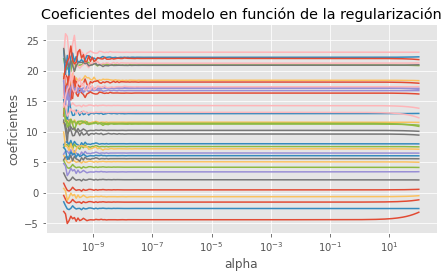

In [41]:
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

In [42]:
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 19.656510317933773
